# 7-2. scikit-learnライブラリ

scikit-learnライブラリについて説明します。

参考

- https://scikit-learn.org/stable/tutorial/index.html
- https://scikit-learn.org/stable/getting_started.html

機械学習の各手法の詳細については以下を参考にしてください

- https://elf-c.he.u-tokyo.ac.jp/courses/364 （線形回帰）
- https://elf-c.he.u-tokyo.ac.jp/courses/365 （ロジスティック回帰)
- https://elf-c.he.u-tokyo.ac.jp/courses/360 （クラスタリング）
- https://elf-c.he.u-tokyo.ac.jp/courses/363 （次元削減（主成分分析））

**scikit-learn**ライブラリには分類、回帰、クラスタリング、次元削減、前処理、モデル選択などの機械学習の処理を行うためのモジュールが含まれています。以下では、scikit-learnライブラリのモジュールの基本的な使い方について説明します。

***以下の説明ではscikit-learnライブラリのバージョン0.22以降を想定しています。*** Anaconda （Individual Edition 2020.02）では同0.22がインストールされています。colaboratoryでも同0.22以降が使用可能です。

## 機械学習について
**機械学習**では、観察されたデータをよく表すようにモデルのパラメータの調整を行います。パラメータを調整することでモデルをデータに適合させるので、「学習」と呼ばれます。学習されたモデルを使って、新たに観測されたデータに対して予測を行うことが可能になります。

## 教師あり学習
機械学習において、観測されたデータの特徴（特徴量）に対して、そのデータに関するラベルが存在する時、**教師あり学習**と呼びます。教師あり学習では、ラベルを教師として、データからそのラベルを予測するようなモデルを学習することになります。この時、ラベルが連続値であれば回帰、ラベルが離散値であれば分類の問題となります。

## 教師なし学習
ラベルが存在せず、観測されたデータの特徴のみからそのデータセットの構造やパターンをよく表すようなモデルを学習することを**教師なし学習**と呼びます。クラスタリングや次元削減は教師なし学習です。クラスタリングでは、観測されたデータをクラスタと呼ばれる集合にグループ分けします。次元削減では、データの特徴をより簡潔に（低い次元で）表現します。

## データ
機械学習に用いるデータセットは、データフレームあるいは2次元の配列として表すことができます。行はデータセットの個々のデータを表し、列はデータが持つ特徴を表します。以下では、例として `pandas` モジュールの説明で用いたアイリスデータセットを表示しています。

In [1]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


データセットの各行は1つの花のデータに対応しており、行数はデータセットの花データの総数を表します。また、1列目から4列目までの各列は花の特徴（特徴量）に対応しています。scikit-learnでは、このデータと**特徴量**からなる2次元配列（行列）をNumPy配列または `pandas` のデータフレームに格納し、入力データとして処理します。5列目は、教師あり学習におけるデータのラベルに対応しており、ここでは各花データの花の種類（全部で3種類）を表しています。ラベルは通常1次元でデータの数だけの長さを持ち、NumPy配列または `pandas` のシリーズに格納します。先に述べた通り、ラベルが連続値であれば回帰、ラベルが離散値であれば分類の問題となります。機械学習では、特徴量からこのラベルを予測することになります。

アイリスデータセットはscikit-learnが持つデータセットにも含まれており、`load_iris` 関数によりアイリスデータセットの特徴量データとラベルデータを以下のようにNumPyの配列として取得することもできます。この時、ラベルは数値 (`0`, `1`, `2`) に置き換えられています。

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

## モデル学習の基礎
scikit-learnでは、以下の手順でデータからモデルの学習を行います。

- 使用するモデルのクラスの選択
- モデルのハイパーパラメータの選択とインスタンス化
- データの準備
    - 教師あり学習では、特徴量データとラベルデータを準備
    - 教師あり学習では、特徴量・ラベルデータをモデル学習用の訓練データとモデル評価用のテストデータに分ける
    - 教師なし学習では、特徴量データを準備
- モデルをデータに適合（`fit()` メソッド）
- モデルの評価
    - 教師あり学習では、`predict()` メソッドを用いてテストデータの特徴量データからラベルデータを予測しその精度を評価を行う
    - 教師なし学習では、`transform()` または `predict()` メソッドを用いて特徴量データのクラスタリングや次元削減などを行う

## 教師あり学習・分類の例
以下では、アイリスデータセットを用いて花の4つの特徴から3つの花の種類を分類する手続きを示しています。scikit-learnでは、すべてのモデルはPythonクラスとして実装されており、ここでは分類を行うモデルの一つである**ロジスティック回帰** (`LogisticRegression`) クラスをインポートしています。

[LogisticRegressionクラス](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

`train_test_split()` はデータセットを訓練データとテストデータに分割するための関数、`accuracy_score()` はモデルの予測精度を評価するための関数です。

特徴量データ (`X_irist`) とラベルデータ (`y_iris`) からなるデータセットを訓練データ (`X_train`, `y_train`) とテストデータ (`X_test`, `y_test`) に分割しています。ここでは、`train_test_split()` 関数の `test_size` 引数にデータセットの30%をテストデータとすることを指定しています。また、`stratify` 引数にラベルデータを指定することで、訓練データとテストデータ、それぞれでラベルの分布が同じになるようにしています。

ロジスティック回帰クラスのインスタンスを作成し、`fit()` メソッドによりモデルを訓練データに適合させています。そして、`predict()` メソッドを用いてテストデータの特徴量データ (`X_test`) のラベルを予測し、`accuracy_score()` 関数で実際のラベルデータ (`y_test`) と比較して予測精度の評価を行なっています。97%の精度で花の4つの特徴から3つの花の種類を分類できていることがわかります。

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data # 特徴量データ
y_iris = iris.target # ラベルデータ

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1, stratify=y_iris)

# ロジスティック回帰モデル：solver引数には最適化手法、multi_classには多クラス分類の方法を指定
# ここではそれぞれのデフォルト値、lbfgsとautoを指定
model=LogisticRegression(solver='lbfgs',  multi_class='auto')

model.fit(X_train, y_train) # モデルを訓練データに適合
y_predicted=model.predict(X_test) # テストデータでラベルを予測
accuracy_score(y_test, y_predicted) # 予測精度（accuracy）の評価

0.9777777777777777

## 練習
アイリスデータセットの2つの特徴量、`petal_length` と ` petal_width`、から2つの花の種類、`versicolor` か `virginica`、を予測するモデルをロジスティック回帰を用いて学習し、その予測精度を評価してください。以下では `pandas` データフレームの `values` 属性を用いてNumPy配列を取得しています。

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = pd.read_csv('iris.csv')
iris2=iris[(iris['species']=='versicolor')|(iris['species']=='virginica')]
X_iris=iris2[['petal_length','petal_width']].values
y_iris=iris2['species'].values

###  your code here

上記のコードが完成したら、以下のコードを実行して、2つの特徴量、`petal_length` と `petal_width`、から2つの花の種類、`versicolor` か `virginica`、を分類するための決定境界を可視化してみてください。`model` は上記の練習で学習されたモデルとします。決定境界は、学習の結果得られた、特徴量の空間においてラベル（クラス）間を分離する境界を表しています。

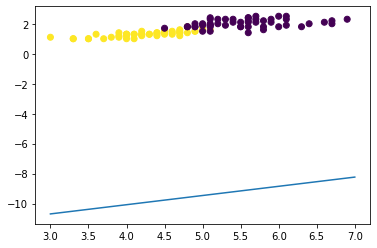

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
w2 = model.coef_[0,1]
w1 = model.coef_[0,0]
w0 = model.intercept_[0]

line=np.linspace(3,7)
plt.plot(line, -(w1*line+w0)/w2)
y_c = (y_iris=='versicolor').astype(np.int)
plt.scatter(iris2['petal_length'],iris2['petal_width'],c=y_c);

## 教師あり学習・回帰の例
以下では、アイリスデータセットを用いて花の特徴の1つ、`petal_length`、からもう一つの特徴、`petal_width`、を回帰する手続きを示しています。この時、`petal_length` は特徴量、`petal_width` は連続値のラベルとなっています。まず、`matplotlib` の散布図を用いて `petal_length` と `petal_width` の関係を可視化してみましょう。関係があるといえそうでしょうか。

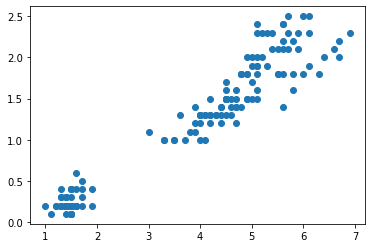

In [6]:
iris = pd.read_csv('iris.csv')
X=iris[['petal_length']].values
y=iris['petal_width'].values
plt.scatter(X,y);

次に、回帰を行うモデルの一つである**線形回帰** (`LinearRegression`) クラスをインポートしています。

[LinearRegressionクラス](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

`mean_squared_error()` は平均二乗誤差によりモデルの予測精度を評価するための関数です。

データセットを訓練データ (`X_train`, `y_train`) とテストデータ (`X_test`, `y_test`) に分割し、線形回帰クラスのインスタンスの `fit()` メソッドによりモデルを訓練データに適合させています。そして、`predict()` メソッドを用いてテストデータの `petal_length` の値から `petal_width` の値を予測し、`mean_squared_error()` 関数で実際の `petal_widthの値` (`y_test`) と比較して予測精度の評価を行なっています。

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model=LinearRegression() # 線形回帰モデル
model.fit(X_train,y_train) # モデルを訓練データに適合
y_predicted=model.predict(X_test) # テストデータで予測
mean_squared_error(y_test,y_predicted) # 予測精度（平均二乗誤差）の評価

0.03974445760904277

以下では、線形回帰モデルにより学習された `petal_length` と `petal_width` の関係を表す回帰式を可視化しています。学習された回帰式が実際のデータに適合していることがわかります。

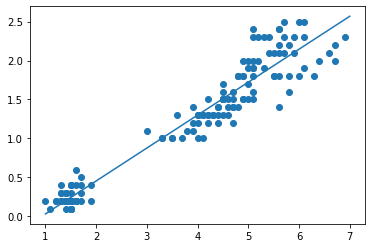

In [8]:
x_plot=np.linspace(1,7)
X_plot=x_plot[:,np.newaxis]
y_plot=model.predict(X_plot)
plt.scatter(X,y)
plt.plot(x_plot,y_plot);

## 教師なし学習・クラスタリングの例
以下では、アイリスデータセットを用いて花の2つの特徴量、`petal_lenghとpetal_width`、を元に花のデータをクラスタリングする手続きを示しています。ここでは**クラスタリング**を行うモデルの一つである `KMeans` クラスをインポートしています。

[KMeansクラス](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

特徴量データ (`X_irist`) を用意し、引数 `n_clusters` にハイパーパラメータとしてクラスタ数、ここでは `3`、を指定して `KMeans` クラスのインスタンスを作成しています。そして、`fit()` メソッドによりモデルをデータに適合させ、`predict()` メソッドを用いて各データが所属するクラスタの情報 (`y_km`) を取得しています。

学習された各花データのクラスタ情報を元のデータセットのデータフレームに列として追加し、クラスタごとに異なる色でデータセットを可視化しています。2つの特徴量、`petal_lengh` と `petal_width`、に基づき、3つのクラスタが得られていることがわかります。

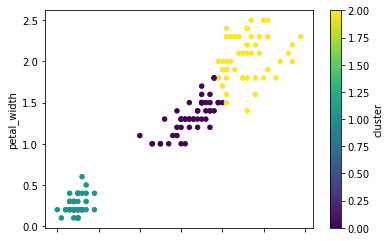

In [9]:
from sklearn.cluster import KMeans

iris = pd.read_csv('iris.csv')
X_iris=iris[['petal_length', 'petal_width']].values

model = KMeans(n_clusters=3) # k-meansモデル
model.fit(X_iris) # モデルをデータに適合
y_km=model.predict(X_iris) # クラスタを予測

iris['cluster']=y_km
iris.plot.scatter(x='petal_length', y='petal_width', c='cluster', colormap='viridis');

3つのクラスタと3つの花の種類の分布を2つの特徴量、`petal_lengh` と `petal_width`、の空間で比較してみると、クラスタと花の種類には対応があり、2つの特徴量から花の種類をクラスタとしてグループ分けできていることがわかります。以下では可視化に `seaborn` モジュールを用いています。

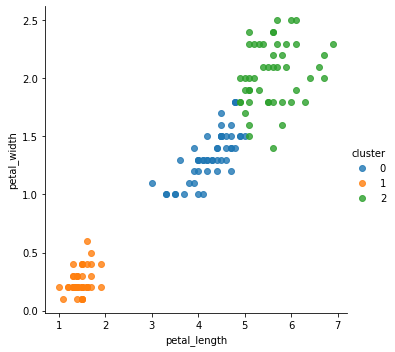

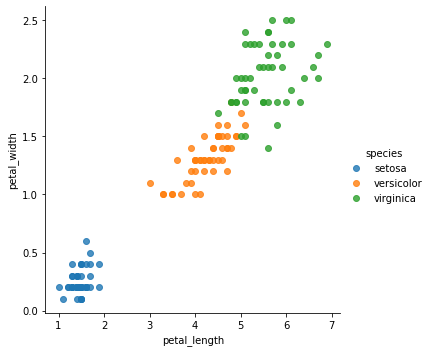

In [10]:
import seaborn as sns
sns.lmplot('petal_length','petal_width',hue='cluster',data=iris,fit_reg=False);
sns.lmplot('petal_length','petal_width',hue='species',data=iris,fit_reg=False);

## 練習
アイリスデータセットの2つの特徴量、`sepal_length` と `sepal_width`、を元に、`KMeans` モデルを用いて花のデータをクラスタリングしてください。クラスタの数は任意に設定してください。

In [11]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('iris.csv')
X_iris=iris[['sepal_length', 'sepal_width']].values

### your code here

## 教師なし学習・次元削減の例
以下では、アイリスデータセットを用いて花の4つの特徴量を元に花のデータを**次元削減**する手続きを示しています。ここでは次元削減を行うモデルの一つである `PCA` クラスをインポートしています。

[PCAクラス](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

特徴量データ (`X_irist`) を用意し、引数 `n_components` にハイパーパラメータとして削減後の次元数、ここでは `2`、を指定して `PCA` クラスのインスタンスを作成しています。そして、`fit()` メソッドによりモデルをデータに適合させ、`transform()` メソッドを用いて4つの特徴量を2次元に削減した特徴量データ (`X_2d`) を取得しています。

学習された各次元の値を元のデータセットのデータフレームに列として追加し、データセットを削減して得られた次元の空間において、データセットを花の種類ごとに異なる色で可視化しています。削減された次元の空間において、花の種類をグループ分けできていることがわかります。

In [12]:
from sklearn.decomposition import PCA

iris = pd.read_csv('iris.csv')
X_iris=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

model = PCA(n_components=2) # PCAモデル
model.fit(X_iris) # モデルをデータに適合
X_2d=model.transform(X_iris) # 次元削減

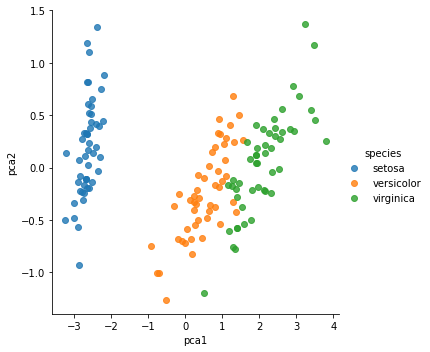

In [13]:
import seaborn as sns
iris['pca1']=X_2d[:,0]
iris['pca2']=X_2d[:,1]
sns.lmplot('pca1','pca2',hue='species',data=iris,fit_reg=False);

## 練習の解答例

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = pd.read_csv('iris.csv')
iris2=iris[(iris['species']=='versicolor')|(iris['species']=='virginica')]
X_iris=iris2[['petal_length','petal_width']].values
y_iris=iris2['species'].values

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1, stratify=y_iris)

model=LogisticRegression(solver='lbfgs',  multi_class='auto')
model.fit(X_train, y_train)
y_model=model.predict(X_test)
accuracy_score(y_test, y_model)

0.9666666666666667

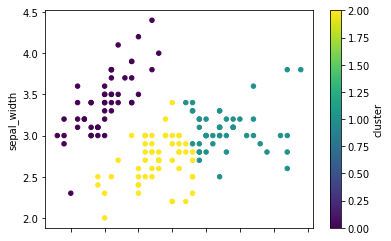

In [15]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('iris.csv')
X_iris=iris[['sepal_length', 'sepal_width']].values

model = KMeans(n_clusters=3)
model.fit(X_iris)
y_km=model.predict(X_iris)

iris['cluster']=y_km
iris.plot.scatter(x='sepal_length', y='sepal_width', c='cluster', colormap='viridis');